In [111]:
import numpy as np
import os
import shutil
import glob
import re
from tqdm import tnrange, tqdm_notebook
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('lato_style.mplstyle')

In [112]:
sim_dir = '/media/david/Boar/PdFeIr/hexagonal_system/relaxation/hexagons_phase_diagram_B_L/'
top_charge_dir = '/media/david/Boar/PdFeIr/hexagonal_system/relaxation/hexagons_phase_diagram_B_L/top_charges/'

In [113]:
energy_file_list = glob.glob(sim_dir + 'energies/*.txt')

In [114]:
def get_radius(f):
    return int(re.search('(?<=_R)\d+(?=e-1nm)', f).group(0))

def get_field(f):
    return int(re.search('(?<=_B).+(?=mT)', f).group(0))

def get_init_state(f):
    return re.search('(?<=mT_)[A-Z0-9]+(?=_E)', f).group(0)


In [115]:
data = {}

In [116]:
# for fpath in energy_file_list[:200]:
for i in tnrange(len(energy_file_list), desc='Energies'):
    fpath = energy_file_list[i]

    _file = os.path.basename(fpath)
    fpath_Q = os.path.join(top_charge_dir, _file.replace('_E.', '_Q.'))
    
    R = get_radius(_file)  # in 1e-1 nm
    B = get_field(_file)   # in mT
    IS = get_init_state(_file)
    
    if R == 10:
        print(fpath)
    
    if R not in data.keys():
        data[R] = {}
    
    if B not in data[R].keys():
        data[R][B] = {}
        
    if 'init_states' not in data[R][B].keys():
        data[R][B]['init_states'] = []
    if 'energies' not in data[R][B].keys():
        data[R][B]['energies'] =  np.array([])
    if 'Q' not in data[R][B].keys():
        data[R][B]['Q'] =  np.array([])
        
    if IS not in data[R][B]['init_states']:
        data[R][B]['init_states'].append(IS)
        data[R][B]['energies'] = np.append(data[R][B]['energies'],
                                           np.loadtxt(fpath)
                                           )
        data[R][B]['Q'] = np.append(data[R][B]['Q'],
                                    np.loadtxt(fpath_Q)
                                    )

In [117]:
for R in data.keys():
    if len(data[R].keys()) != len(range(0, 2001, 50)):
        print(R, B)
        print(data[R])

In [118]:
data_emin = {}

In [119]:
for R in range(40, 201, 5):
    if R not in data_emin.keys():
        data_emin[R] = {}
    
    for B in range(0, 2001, 50):
        if B not in data_emin[R].keys():
            data_emin[R][B] = {}

            min_energy = np.min(data[R][B]['energies'])
            state_idx = np.where(data[R][B]['energies'] == min_energy)[0][0]

            data_emin[R][B]['energy_min'] = min_energy
            data_emin[R][B]['Q'] = data[R][B]['Q'][state_idx]
            data_emin[R][B]['state_min'] = data[R][B]['init_states'][state_idx]
        

In [10]:
data_emin[40]

{0: {'energy_min': -1.8001047617573098e-18,
  'Q': -0.00018900142693494579,
  'state_min': 'HX6'},
 50: {'energy_min': -1.8001169000639154e-18,
  'Q': 0.0031489865018919875,
  'state_min': 'MD2H'},
 100: {'energy_min': -1.8002003255188044e-18,
  'Q': -0.09500931462312717,
  'state_min': 'HY4'},
 150: {'energy_min': -1.8004593914952766e-18,
  'Q': -0.09043347804094025,
  'state_min': 'HY4'},
 200: {'energy_min': -1.8007429913605458e-18,
  'Q': -0.085759759452801,
  'state_min': 'HY4'},
 250: {'energy_min': -1.8012286958030455e-18,
  'Q': 0.16974113144409003,
  'state_min': 'MD3'},
 300: {'energy_min': -1.802039599253802e-18,
  'Q': 0.16748555974346088,
  'state_min': 'MD2'},
 350: {'energy_min': -1.802851955251057e-18,
  'Q': 0.1652952240045757,
  'state_min': 'MD2'},
 400: {'energy_min': -1.8036657203450465e-18,
  'Q': 0.163164742852128,
  'state_min': 'MD2'},
 450: {'energy_min': -1.8044808536410762e-18,
  'Q': 0.16109274720551442,
  'state_min': 'MD2'},
 500: {'energy_min': -1.805297

# Q number plot

In [11]:
Q_plot_data = []

for B in range(2000, -1, -50):
    R_data = []
    for R in range(40, 201, 5):
        R_data.append(data_emin[R][B]['Q'])
    
    Q_plot_data.append(R_data)
    
Q_plot_data = np.array(Q_plot_data)

In [77]:
ccmap = matplotlib.colors.ListedColormap(['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
                                         '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928'])

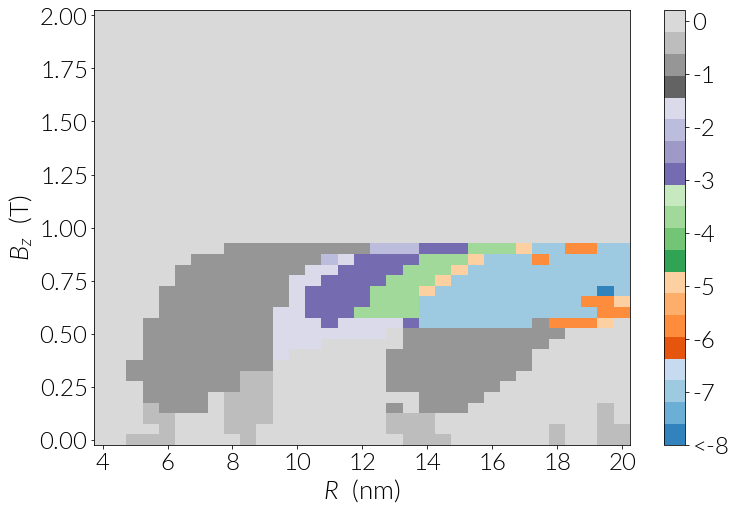

In [107]:
plt.figure(figsize=(12, 8))

plt.imshow(Q_plot_data, cmap='tab20c',
           aspect='auto',
           extent=[4 - 0.25, 20 + 0.25, 
                   0 - 0.025, 2 + 0.025],
           vmin=-8, vmax=0.2
           )
c = plt.colorbar()
c.set_ticks([i for i in np.arange(0, -8.1, -1)])
c.set_ticklabels(['{:.0f}'.format(i) for i in np.arange(0, -7.1, -1)] + ['<-8'])

plt.ylabel(r'$B_{z}$  (T)')
plt.xlabel(r'$R$  (nm)')

plt.xticks([4, 6, 8, 10, 12, 14, 16, 18, 20])

# plt.savefig('PdFeIr_phase_diagram_Q.pdf', bbox_inches='tight')
plt.show()

(-0.025, 1.025)

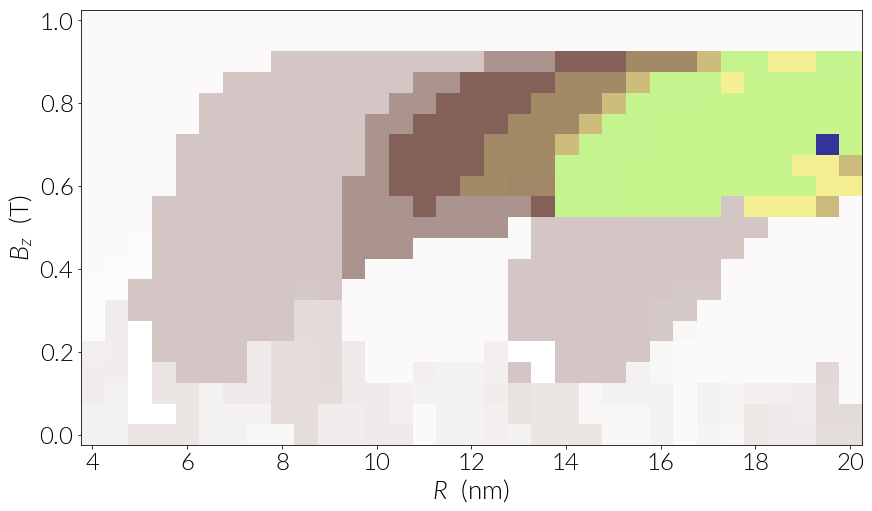

In [121]:
plt.figure(figsize=(14, 8))

plt.imshow(Q_plot_data, cmap='terrain',
           aspect='auto',
           extent=[4 - 0.25, 20 + 0.25, 
                   0 - 0.025, 2 + 0.025])
# c = plt.colorbar()

plt.ylabel(r'$B_{z}$  (T)')
plt.xlabel(r'$R$  (nm)')

plt.xticks([4, 6, 8, 10, 12, 14, 16, 18, 20])

plt.ylim(0-0.025, 1+0.025)

# plt.savefig('PdFeIr_phase_diagram_Q.pdf', bbox_inches='tight')

# Images of lower energy states

In [122]:
Rs = range(40, 201, 5)
Bs = range(2000, -1, -50)

In [125]:
pngs_dir = '/media/david/Boar/PdFeIr/hexagonal_system/relaxation/pngs/'

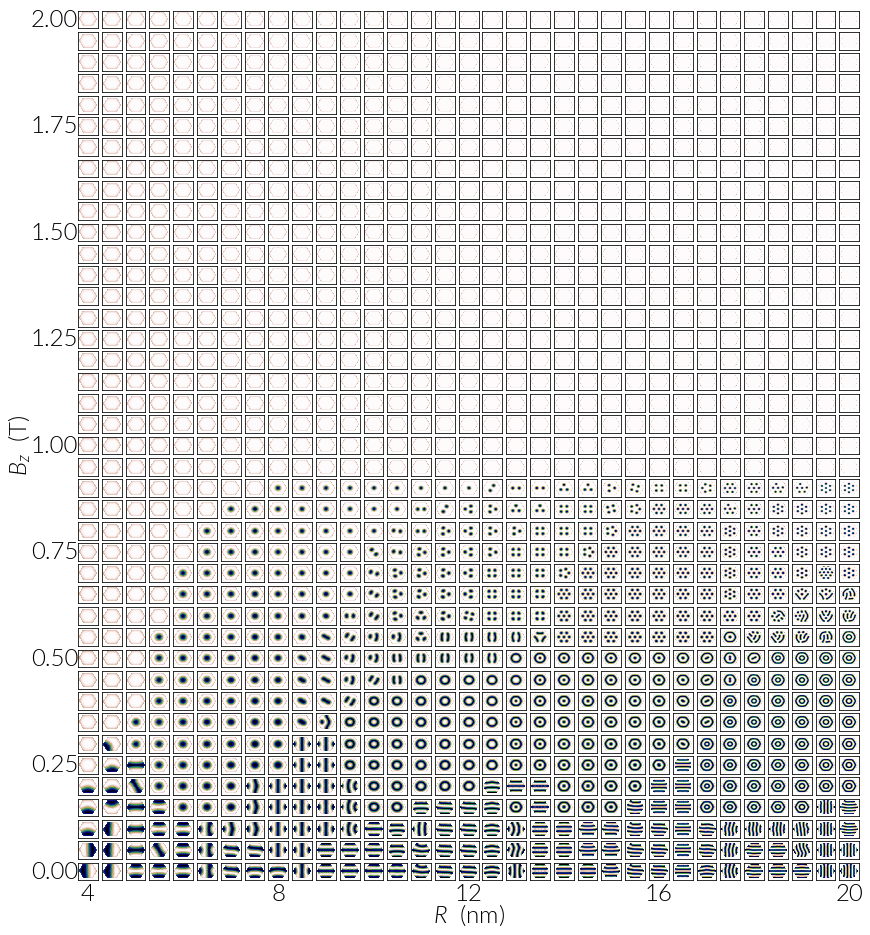

In [126]:
f, axs = plt.subplots(ncols=len(Rs), nrows=len(Bs), figsize=(14, 16))
ax_grid = axs.flatten()

i = -1
for B in Bs:
    for R in Rs:
        # B = 650
        i += 1

        st = data_emin[R][B]['state_min']
        sim_name = 'PdFe-Ir_hexagon_R{}e-1nm_B{}mT_{}'.format(R, B, st)
        png_file = pngs_dir + '{}.png'.format(sim_name)

        if not os.path.exists(png_file):
            continue

        im = plt.imread(png_file)
        ax_grid[i].imshow(im, aspect='auto')
    
for ax in ax_grid:
    ax.set_xticks([])
    ax.set_yticks([])
    
base_i = (len(Bs) - 1) * len(Rs)
for j, i in enumerate(range(0, len(Rs), 8)):
    ax = ax_grid[base_i + i]
    lbl = 4 + j * 4
    ax.set_xlabel('{}'.format(lbl), fontsize=24)
    
    if j == 2:
        ax.text(0.5, -1.25, r'$R$  (nm)',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax.transAxes,
            fontsize=24, rotation=0
            )
    
for j, i in enumerate(range(0, len(Bs) * len(Rs) - 1, 5 * len(Rs))):
    ax = ax_grid[i]
    lbl = 2.0 - 0.05 * 5 * j
    # ax_grid[i].set_ylabel('{:.2f}'.format(lbl), rotation=0)
    
    ax.text(0., 0.45, '{:.2f}'.format(lbl),
            horizontalalignment='right',
            verticalalignment='center',
            transform=ax.transAxes,
            fontsize=24
            )
    
    if j == 4:
        ax.text(-2.25, 0.5, r'$B_z$  (T)',
            horizontalalignment='right',
            verticalalignment='center',
            transform=ax.transAxes,
            fontsize=24, rotation=90
            )
        

# plt.savefig('PdFeIr_phase_diagram.png', bbox_inches='tight', dpi=300)

In [19]:
list(Bs)[20:]

[1000,
 950,
 900,
 850,
 800,
 750,
 700,
 650,
 600,
 550,
 500,
 450,
 400,
 350,
 300,
 250,
 200,
 150,
 100,
 50,
 0]

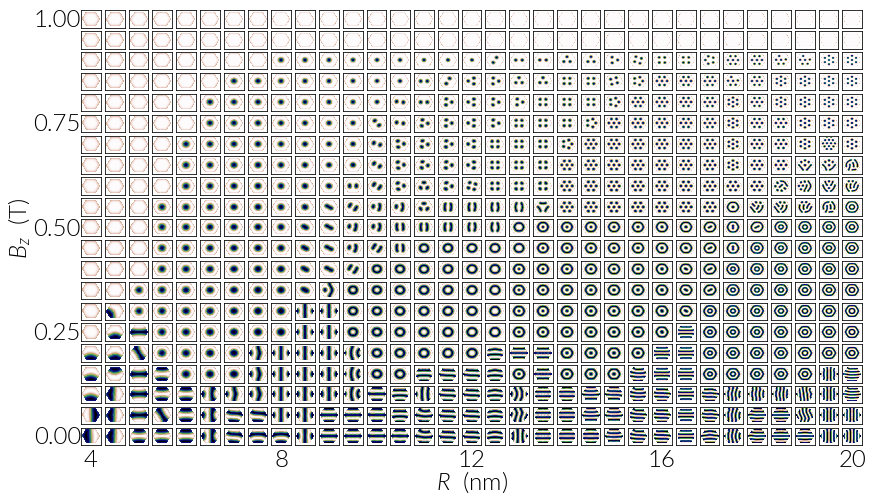

In [28]:
f, axs = plt.subplots(ncols=len(Rs), nrows=len(Bs[20:]), figsize=(14, 8))
ax_grid = axs.flatten()

i = -1
for B in Bs[20:]:
    for R in Rs:
        # B = 650
        i += 1

        st = data_emin[R][B]['state_min']
        sim_name = 'PdFe-Ir_hexagon_R{}e-1nm_B{}mT_{}'.format(R, B, st)
        png_file = pngs_dir + '{}.png'.format(sim_name)

        if not os.path.exists(png_file):
            continue

        im = plt.imread(png_file)
        ax_grid[i].imshow(im, aspect='auto')
    
for ax in ax_grid:
    ax.set_xticks([])
    ax.set_yticks([])
    
base_i = (len(Bs[20:]) - 1) * len(Rs)
for j, i in enumerate(range(0, len(Rs), 8)):
    ax = ax_grid[base_i + i]
    lbl = 4 + j * 4
    ax.set_xlabel('{}'.format(lbl), fontsize=24)
    
    if j == 2:
        ax.text(0.5, -1.4, r'$R$  (nm)',
            horizontalalignment='center',
            verticalalignment='top',
            transform=ax.transAxes,
            fontsize=24, rotation=0
            )
    
for j, i in enumerate(range(0, len(Bs[20:]) * len(Rs) - 1, 5 * len(Rs))):
    ax = ax_grid[i]
    lbl = 1.0 - 0.05 * 5 * j
    # ax_grid[i].set_ylabel('{:.2f}'.format(lbl), rotation=0)
    
    ax.text(0., 0.45, '{:.2f}'.format(lbl),
            horizontalalignment='right',
            verticalalignment='center',
            transform=ax.transAxes,
            fontsize=24
            )
    
    if j == 2:
        ax.text(-2.4, 0.5, r'$B_z$  (T)',
            horizontalalignment='right',
            verticalalignment='center',
            transform=ax.transAxes,
            fontsize=24, rotation=90
            )
        

plt.savefig('PdFeIr_phase_diagram_CUT.png', bbox_inches='tight', dpi=300)

In [125]:
len(Bs)

41

In [73]:
energy_file_list[0]

'/media/david/Boar/hexagons_phase_diagram_B_L/energies/PdFe-Ir_hexagon_R70e-1nm_B1250mT_MD2H_E.txt'

In [30]:
data[130][150]

{'init_states': ['3PID',
  'TGTU',
  'HY6',
  'R24',
  '4PIU',
  'MD1H',
  'HX6',
  '4PID',
  'R99',
  'MD4',
  'MD2H',
  'HY4',
  'R42',
  'MD6',
  '3PIU',
  'TGTD',
  'MD5',
  'FMU',
  'MD3',
  'HX4',
  'MD7',
  'MD2',
  'HY2',
  'HX2',
  'SKD'],
 'energies': array([-1.98651768e-17, -1.98619359e-17, -1.98596534e-17, -1.98499017e-17,
        -1.98524137e-17, -1.98605943e-17, -1.98604807e-17, -1.98621000e-17,
        -1.98471104e-17, -1.98585595e-17, -1.98632010e-17, -1.98647863e-17,
        -1.98552756e-17, -1.98549086e-17, -1.98544908e-17, -1.98489722e-17,
        -1.98569050e-17, -1.97952061e-17, -1.98583724e-17, -1.98650128e-17,
        -1.98527264e-17, -1.98584733e-17, -1.98595080e-17, -1.98649767e-17,
        -1.98526397e-17]),
 'Q': array([-0.84868577,  0.16215964, -0.08691163,  1.57727199,  1.17748284,
        -0.83372121, -0.57125282, -1.23293234,  4.52687052, -3.86492447,
        -1.85677943, -0.09030511, -4.09504447, -5.86930538,  0.8577734 ,
        -0.1562285 , -4.86572996

In [31]:
np.min(data[130][150]['energies'])

-1.986517684436053e-17

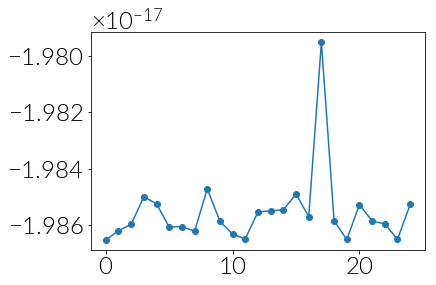

In [34]:
plt.plot(data[130][150]['energies'], 'o-')

In [110]:
data_emin[195][700]

{'energy_min': -4.4755248559290754e-17,
 'Q': -12.562364374600428,
 'state_min': 'R24'}

# VTK plots

In [48]:
import vtk
from vtk.util.numpy_support import vtk_to_numpy

In [51]:
vtks_dir = sim_dir + 'vtks/'

In [52]:
vtks_folders = os.listdir(vtks_dir)

In [53]:
vtks_folders[0]

'PdFe-Ir_hexagon_R100e-1nm_B1400mT_3PID_vtks'

In [134]:
reader = vtk.vtkPolyDataReader()
vtk_sim_folder = os.path.join(vtks_dir, vtks_folders[0])
vtk_file = glob.glob(vtk_sim_folder + '/*.vtk')[0]
reader.SetFileName(vtk_file)
reader.ReadAllVectorsOn()
reader.Update()

In [135]:
vtk_file

'/media/david/Boar/hexagons_phase_diagram_B_L/vtks/PdFe-Ir_hexagon_R100e-1nm_B1400mT_3PID_vtks/m_001457.vtk'

In [136]:
vtk_data = reader.GetOutput()

In [243]:
# Mapping data: cell -> point
# mapper = vtk.vtkCellDataToPointData()
# mapper.AddInputData(vtk_data)
# mapper.Update()
# mapped_data = mapper.GetOutput()
# mapped_data.GetNumberOfPoints()

Get data at cell centers:

In [218]:
cc = vtk.vtkCellCenters()

In [220]:
cc.AddInputData(vtk_data)
cc.Update()

In [232]:
ccc = cc.GetOutput()
ccc.GetNumberOfPoints()

5625

In [239]:
coordinates = []
for i in range(ccc.GetNumberOfPoints()):
    coordinates.append(cc.GetOutput().GetPoint(i))

In [240]:
coordinates = np.array(coordinates)

In [250]:
cell_data = vtk_to_numpy(cc.GetOutput().GetPointData().GetArray(1))

In [252]:
norm = np.sqrt(np.sum(cell_data ** 2, axis=1))
fltr = norm > 1e-8

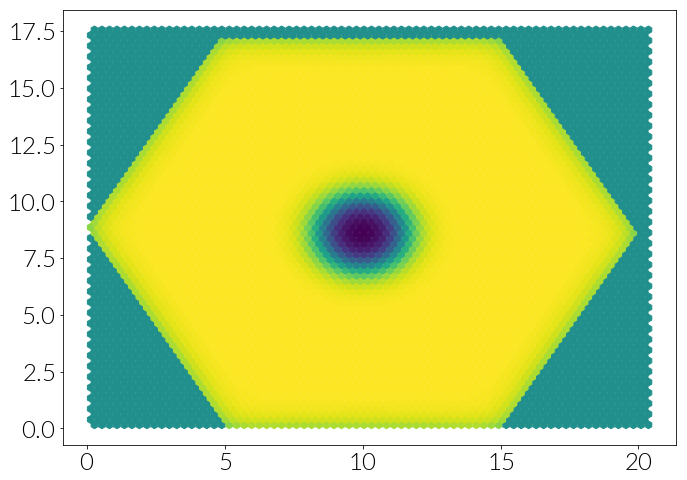

In [265]:
plt.figure(figsize=(11, 8))
# plt.hexbin(coordinates[:, 0][fltr], coordinates[:, 1][fltr], C=cell_data[:, 2][fltr])
plt.scatter(coordinates[:, 0], 
            coordinates[:, 1], 
            c=cell_data[:, 2],
            marker='h', s=60
            )